In [1]:
import sys
sys.path.append('../scripts')
from data_loader import DataLoader
from sentiment_analysis import SentimentAnalyzer
from plot import SentimentPlotter

<Figure size 1200x500 with 0 Axes>

In [2]:
data_loader = DataLoader()
sentiment = SentimentAnalyzer()
sentiment_visualizer = SentimentPlotter()

In [3]:
df = data_loader.load_csv('../data/processed/reviews_processed.csv')
df.head(5)

Loaded 1140 rows from ../data/processed/reviews_processed.csv


,review,rating,date,bank,source
0,🙏👍,5,2025-11-29,BOA,Google Play
1,Very Good,5,2025-11-28,BOA,Google Play
2,goof,5,2025-11-28,BOA,Google Play
3,good!,5,2025-11-28,BOA,Google Play
4,good jop,5,2025-11-27,BOA,Google Play


### Sentiment Analysis

#### Sentiment Analysis with VADER

**VADER** is a lexicon and rule-based sentiment analysis tool.  
- Fast and lightweight, ideal for short and informal text.  
- Scores range from -1 (negative) to 1 (positive). 

##### VADER Sentiment Counts

In [4]:
df_vader = sentiment.score(df, text_column="review", method="vader")
print("\nVADER sentiment counts:")
print(df_vader["sentiment_label"].value_counts())


VADER sentiment counts:
sentiment_label
positive    570
neutral     400
negative    170
Name: count, dtype: int64


##### VADER - Aggregated Mean Sentiment Scores by Bank and Rating


In [5]:
aggregate_vader = sentiment.aggregate(df_vader, by=["bank", "rating"])
print(aggregate_vader)

      bank  rating  sentiment_score
0      BOA       1        -0.187923
1      BOA       2         0.060543
2      BOA       3         0.123362
3      BOA       4         0.359195
4      BOA       5         0.306328
5      CBE       1        -0.091002
6      CBE       2         0.066627
7      CBE       3         0.085281
8      CBE       4         0.315256
9      CBE       5         0.336920
10  Dashen       1        -0.136368
11  Dashen       2        -0.056639
12  Dashen       3         0.204484
13  Dashen       4         0.344240
14  Dashen       5         0.458600


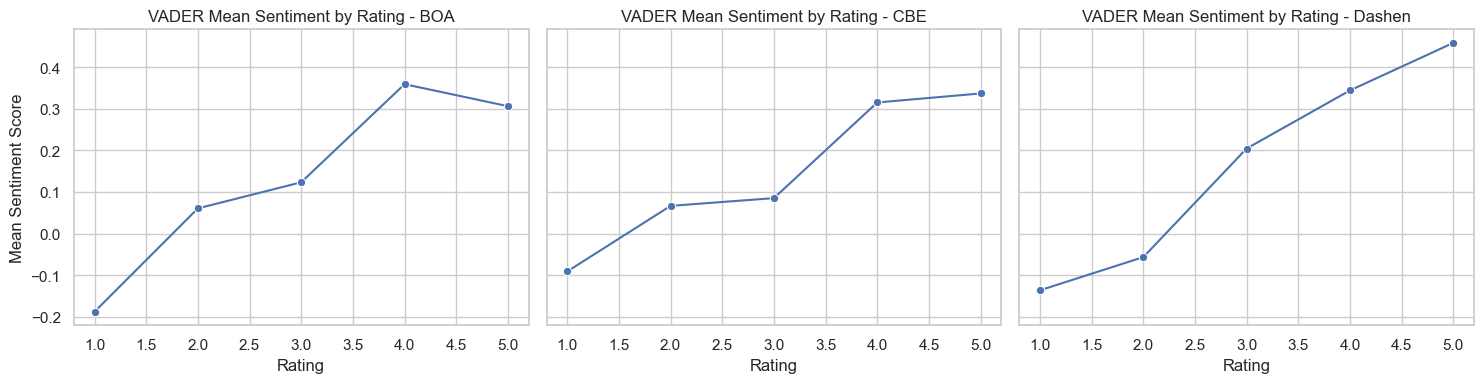

In [6]:
sentiment_visualizer.plot_sentiment_by_bank(aggregate_vader, method_name="VADER")


#### Sentiment Analysis with TextBlob

**TextBlob** is a simple NLP library for sentiment analysis using lexicon-based scoring.  
- Returns polarity (-1 to 1) and subjectivity (0 to 1).  
- Polarity > 0.1 → positive, < -0.1 → negative, otherwise neutral. 

##### TextBlob Sentiment Counts

In [7]:
df_textblob = sentiment.score(df, text_column="review", method="textblob")
print("\nTextBlob sentiment counts:")
print(df_textblob["sentiment_label"].value_counts())


TextBlob sentiment counts:
sentiment_label
positive    540
neutral     477
negative    123
Name: count, dtype: int64


##### TextBlob - Aggregated Mean Sentiment Scores by Bank and Rating


In [8]:
aggregate_textblob = sentiment.aggregate(df_textblob, by=["bank", "rating"])
print(aggregate_textblob)

      bank  rating  sentiment_score
0      BOA       1        -0.110004
1      BOA       2         0.038801
2      BOA       3         0.109596
3      BOA       4         0.247531
4      BOA       5         0.368644
5      CBE       1        -0.066354
6      CBE       2         0.084422
7      CBE       3         0.072231
8      CBE       4         0.217519
9      CBE       5         0.360126
10  Dashen       1        -0.147438
11  Dashen       2         0.068695
12  Dashen       3         0.141090
13  Dashen       4         0.308576
14  Dashen       5         0.428705


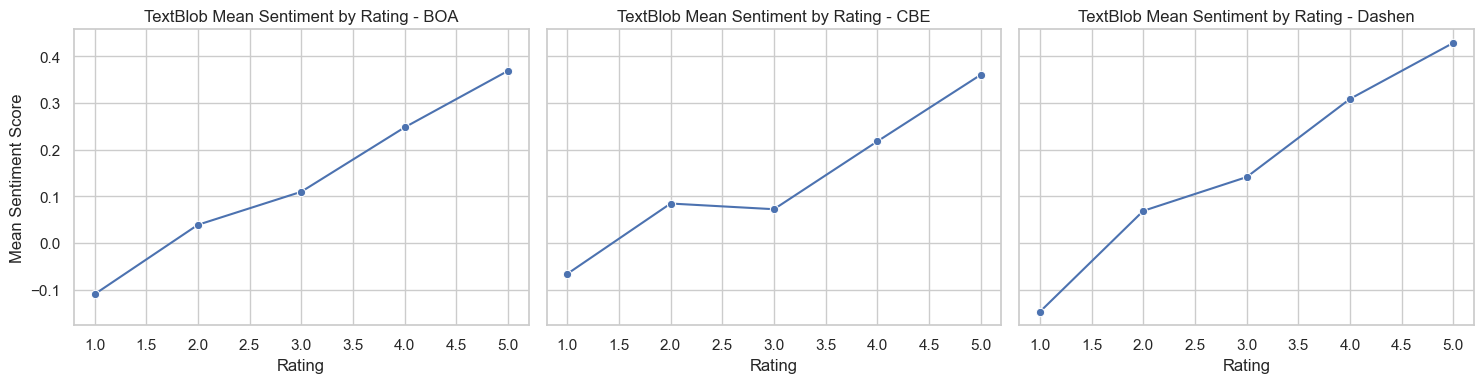

In [9]:
sentiment_visualizer.plot_sentiment_by_bank(aggregate_textblob, method_name="TextBlob")

### Sentiment Analysis with DistilBERT

**DistilBERT (fine-tuned on SST-2)** is a transformer-based deep learning model.  
- Provides context-aware sentiment predictions.  
- Outputs `POSITIVE` or `NEGATIVE` with a confidence score.  
- High accuracy for nuanced or longer reviews.  

##### DistilBERT Sentiment Counts

In [10]:
df_distilbert = sentiment.score(df, text_column="review", method="distilbert")
print("\nDistilbert sentiment counts:")
print(df_distilbert["sentiment_label"].value_counts())

Loading DistilBERT sentiment pipeline...


Device set to use mps:0



Distilbert sentiment counts:
sentiment_label
positive    582
negative    558
Name: count, dtype: int64


##### DistilBERT - Aggregated Mean Sentiment Scores by Bank and Rating


In [11]:
aggregate_distilbert= sentiment.aggregate(df_distilbert, by=["bank", "rating"])
print(aggregate_distilbert)

      bank  rating  sentiment_score
0      BOA       1         0.974719
1      BOA       2         0.949152
2      BOA       3         0.963789
3      BOA       4         0.926586
4      BOA       5         0.944379
5      CBE       1         0.966006
6      CBE       2         0.991354
7      CBE       3         0.981451
8      CBE       4         0.983426
9      CBE       5         0.956083
10  Dashen       1         0.987584
11  Dashen       2         0.979486
12  Dashen       3         0.976568
13  Dashen       4         0.930202
14  Dashen       5         0.972506


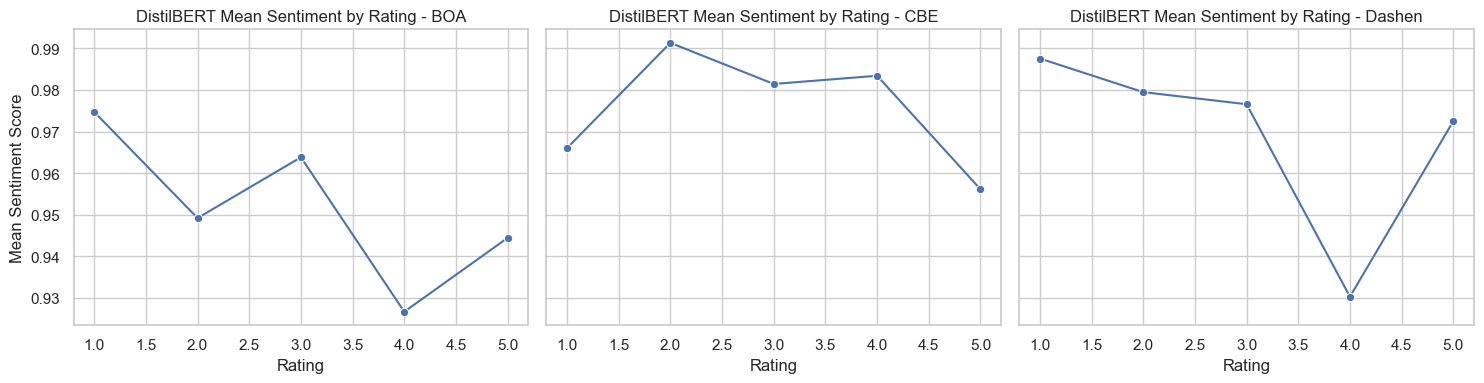

In [12]:
sentiment_visualizer.plot_sentiment_by_bank(aggregate_distilbert, method_name="DistilBERT")

#### Comparison Across Sentiment Analysis Methods

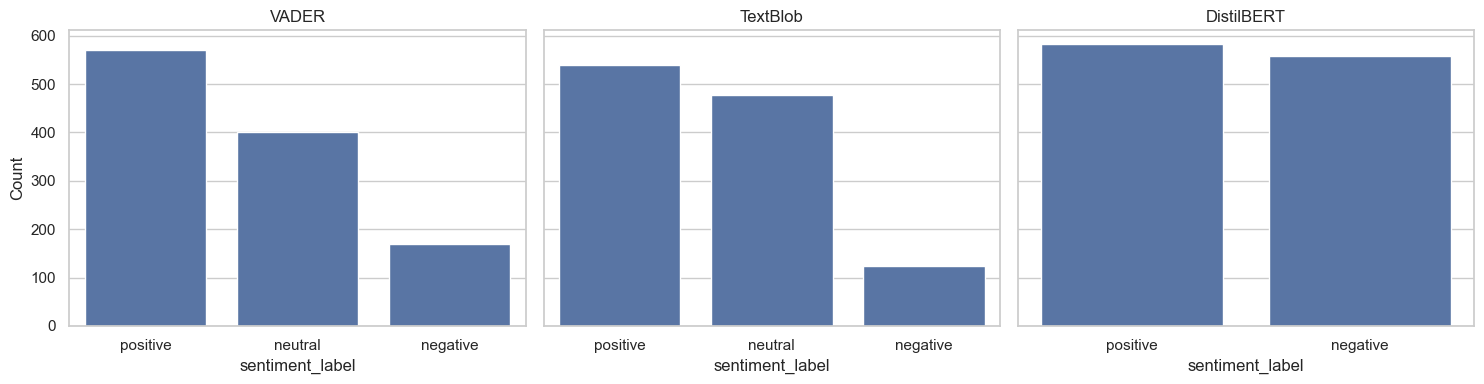

In [ ]:
sentiment_visualizer.plot_comparison(
    [df_vader, df_textblob, df_distilbert],
    ["VADER", "TextBlob", "DistilBERT"]
)

In [15]:
data_loader.df = df_distilbert
data_loader.save_csv("../data/processed/reviews_with_sentiment.csv")

Saved 1140 rows to ../data/processed/reviews_with_sentiment.csv
